In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
data = pd.read_csv(r'C:\Users\MDP\Documents\Proje_B\Inputs\hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [3]:
y= data['label']
x = data.drop(columns = ['label'])
x.shape

(10015, 2352)

In [4]:
other = pd.read_csv(r'C:\Users\MDP\Documents\Proje_B\Inputs\HAM10000_metadata.csv')
other.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
classes = {4: ('nv', 'melanocytic nevi'),
         6: ('mel', 'melanoma'),
         2: ('bkl', 'benign keratosis-like lesions'),
         1: ('bcc', 'basal cell carcinoma'),
         5: ('vasc', 'pyogenic granulomas and hemorrhage'),
         0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
         3: ('df', 'dermatofibroma')}

<AxesSubplot:xlabel='dx', ylabel='count'>

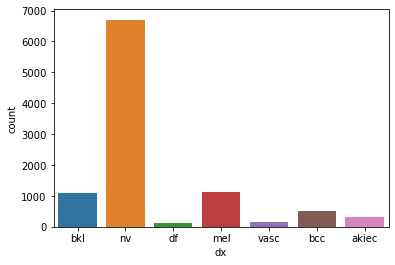

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='dx',data=other)

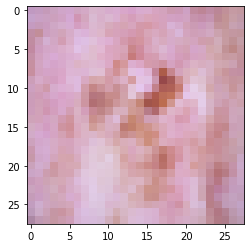

In [11]:
plt.imshow(x.iloc[0].values.reshape(28,28,3))

In [7]:
x.shape

(10015, 2352)

In [8]:
x= np.array(x).reshape(-1,28,28,3)
x.shape

(10015, 28, 28, 3)

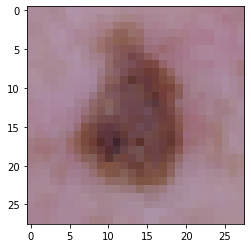

In [23]:
plt.imshow(x[100])

In [19]:
y.shape

(10015,)

In [9]:
x=x/255.0

In [10]:
x[1]

array([[[0.09803922, 0.05490196, 0.11764706],
        [0.26666667, 0.18823529, 0.29411765],
        [0.48235294, 0.36470588, 0.49411765],
        ...,
        [0.48235294, 0.36078431, 0.38823529],
        [0.30980392, 0.20784314, 0.29019608],
        [0.23137255, 0.14509804, 0.24313725]],

       [[0.16470588, 0.10980392, 0.19215686],
        [0.38039216, 0.2745098 , 0.38039216],
        [0.56470588, 0.43529412, 0.56862745],
        ...,
        [0.55294118, 0.42352941, 0.43137255],
        [0.38431373, 0.27058824, 0.30588235],
        [0.24705882, 0.15686275, 0.24705882]],

       [[0.2627451 , 0.18431373, 0.27058824],
        [0.4745098 , 0.34901961, 0.43529412],
        [0.62745098, 0.47058824, 0.60784314],
        ...,
        [0.62745098, 0.49411765, 0.5372549 ],
        [0.47843137, 0.36862745, 0.4       ],
        [0.30196078, 0.21176471, 0.29019608]],

       ...,

       [[0.24705882, 0.15686275, 0.25882353],
        [0.38039216, 0.26666667, 0.36470588],
        [0.55294118, 0

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)

In [16]:
X_train

array([[[[0.89803922, 0.58039216, 0.65490196],
         [0.90588235, 0.57647059, 0.65882353],
         [0.90588235, 0.57254902, 0.66666667],
         ...,
         [0.92941176, 0.61568627, 0.6745098 ],
         [0.92156863, 0.61176471, 0.67843137],
         [0.91372549, 0.61176471, 0.67843137]],

        [[0.89019608, 0.56862745, 0.63529412],
         [0.89019608, 0.55686275, 0.63137255],
         [0.90196078, 0.57254902, 0.65490196],
         ...,
         [0.91372549, 0.61568627, 0.67843137],
         [0.90980392, 0.60784314, 0.66666667],
         [0.90980392, 0.6       , 0.6627451 ]],

        [[0.88235294, 0.56862745, 0.63529412],
         [0.89411765, 0.56862745, 0.63921569],
         [0.89411765, 0.56862745, 0.63921569],
         ...,
         [0.90980392, 0.60784314, 0.67058824],
         [0.91372549, 0.60784314, 0.66666667],
         [0.90980392, 0.60392157, 0.6627451 ]],

        ...,

        [[0.82745098, 0.52156863, 0.57254902],
         [0.85490196, 0.55294118, 0.6       ]

In [13]:
X_train.shape

(8012, 28, 28, 3)

In [26]:
y_train

6582    4
7194    4
9446    4
533     2
132     2
       ..
5734    4
5191    4
5390    4
860     2
7270    4
Name: label, Length: 8012, dtype: int64

In [14]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_train_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
y_train.nunique()

7

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2 

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [16]:
IMAGE_SIZE = [28,28]

In [22]:
i = Input(shape=(28,28,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(7, activation='softmax')(x)

model = Model(i, x)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

In [24]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
r = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_split=0.2)

Epoch 1/20
101/101 [==============================] - 31s 288ms/step - loss: 1.1416 - accuracy: 0.6369 - val_loss: 1.8587 - val_accuracy: 0.0543
Epoch 2/20
101/101 [==============================] - 28s 275ms/step - loss: 0.8487 - accuracy: 0.6862 - val_loss: 1.4570 - val_accuracy: 0.2832
Epoch 3/20
101/101 [==============================] - 33s 324ms/step - loss: 0.8011 - accuracy: 0.7092 - val_loss: 1.2158 - val_accuracy: 0.6706
Epoch 4/20
101/101 [==============================] - 30s 298ms/step - loss: 0.7604 - accuracy: 0.7201 - val_loss: 1.2827 - val_accuracy: 0.5346
Epoch 5/20
101/101 [==============================] - 33s 324ms/step - loss: 0.7435 - accuracy: 0.7285 - val_loss: 0.8607 - val_accuracy: 0.6756
Epoch 6/20
101/101 [==============================] - 32s 315ms/step - loss: 0.7150 - accuracy: 0.7410 - val_loss: 0.8958 - val_accuracy: 0.6744
Epoch 7/20
101/101 [==============================] - 33s 331ms/step - loss: 0.6883 - accuracy: 0.7450 - val_loss: 0.9220 - val_ac

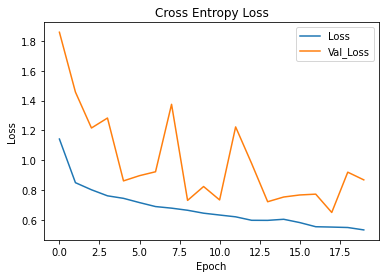

In [27]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper right')
plt.show()

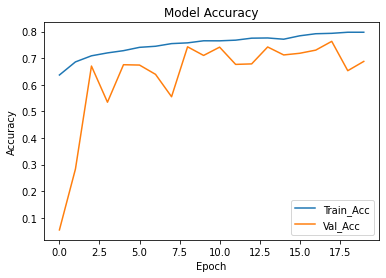

In [26]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')
plt.show()

In [28]:
model.evaluate(X_train, y_train)


251/251 [==============================] - 13s 50ms/step - loss: 0.7972 - accuracy: 0.7059


[0.7971805930137634, 0.7059410810470581]

In [37]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 2s 32ms/step - loss: 0.9072 - accuracy: 0.7109


[0.9072487950325012, 0.7109336256980896]

In [38]:
#Test veri kümesini sınıflandırıcıya gönder
y_pred = model.predict(X_test)
y_pred

array([[5.66748857e-01, 6.12008199e-02, 2.38163099e-01, ...,
        2.72781383e-02, 1.58113404e-03, 4.11233716e-02],
       [2.83903559e-03, 2.23724283e-02, 1.34949103e-01, ...,
        7.18725920e-01, 3.22600757e-03, 1.79886539e-02],
       [8.87355566e-01, 6.78375363e-02, 1.16918162e-02, ...,
        1.46523528e-02, 2.91915276e-05, 1.71460258e-03],
       ...,
       [3.57158594e-02, 6.42542690e-02, 1.03269443e-01, ...,
        6.36899590e-01, 5.75042190e-03, 1.24550276e-01],
       [1.24480878e-03, 1.36377243e-03, 1.76693007e-01, ...,
        3.71593684e-01, 5.40465553e-05, 4.48834956e-01],
       [5.26835676e-04, 2.09375852e-04, 6.74145157e-03, ...,
        9.73518372e-01, 1.29761465e-05, 1.85309630e-02]], dtype=float32)

## CNN

In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [24]:
input_shape = (28, 28, 3)
num_classes = 7

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [26]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [27]:
c = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_split=0.2)

Epoch 1/20
101/101 [==============================] - 19s 182ms/step - loss: 1.1342 - accuracy: 0.6620 - val_loss: 1.0927 - val_accuracy: 0.6719
Epoch 2/20
101/101 [==============================] - 19s 183ms/step - loss: 0.9976 - accuracy: 0.6692 - val_loss: 0.9344 - val_accuracy: 0.6719
Epoch 3/20
101/101 [==============================] - 19s 185ms/step - loss: 0.9459 - accuracy: 0.6694 - val_loss: 0.9255 - val_accuracy: 0.6712
Epoch 4/20
101/101 [==============================] - 20s 199ms/step - loss: 0.9132 - accuracy: 0.6695 - val_loss: 0.8542 - val_accuracy: 0.6706
Epoch 5/20
101/101 [==============================] - 23s 230ms/step - loss: 0.8907 - accuracy: 0.6716 - val_loss: 0.8591 - val_accuracy: 0.6712
Epoch 6/20
101/101 [==============================] - 19s 191ms/step - loss: 0.8840 - accuracy: 0.6736 - val_loss: 0.8498 - val_accuracy: 0.6843
Epoch 7/20
101/101 [==============================] - 18s 174ms/step - loss: 0.8524 - accuracy: 0.6781 - val_loss: 0.8221 - val_ac

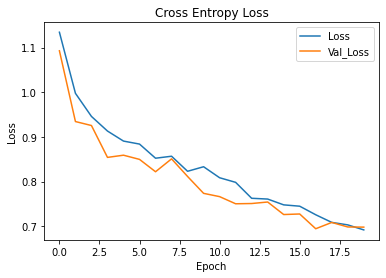

In [28]:
plt.plot(c.history['loss'])
plt.plot(c.history['val_loss'])
plt.title('Cross Entropy Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper right')
plt.show()

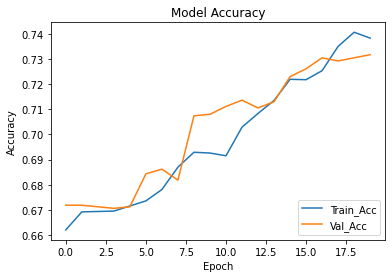

In [29]:
plt.plot(c.history['accuracy'])
plt.plot(c.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')
plt.show()